# **Experiment Notebook**



<hr>

## A. Project


In [ ]:
student_name = 'Shashikanth Senthil Kumar'

In [ ]:
student_id = '25218722'

In [ ]:
experiment_id = '2'

<hr>

## B. Experiment Description


In [ ]:
experiment_hypothesis = '* The hypothesis for this experiment is that higher values of the alpha hyperparameter will provide better predictive performance in Ridge Linear Regression models compared to lower values.\n\nThis is based on the premise that increasing regularization strength (alpha) helps reduce overfitting and improves model generalization, leading to more accurate and robust predictions.'

In [ ]:
experiment_expectations = '* Performance Improvement: We expect that models with higher alpha values will show lower Root Mean Squared Error (RMSE) on the validation and test datasets compared to models with lower alpha values. This should indicate improved model performance and better generalization.\n* Consistent Results: The performance improvement should be evident across all datasets (training, validation, and test). If the hypothesis holds, models with higher alpha values should consistently show better results.\n* Business Relevance: The improved model performance with higher alpha values should translate into more reliable predictions, providing better insights and aiding in more informed decision-making processes in the business context.'

<hr>

## C. Data Understanding


### C.0 Import Packages

In [ ]:
# Pandas for data handling
import pandas as pd

# Scikit Learn for ML training
import sklearn

# Altair for plotting
import altair as alt

# NumPy for numerical computations
import numpy as np

# Matplotlib for basic plotting
import matplotlib.pyplot as plt

# Ensures that Matplotlib plots are displayed inline in the notebook
%matplotlib inline

# Seaborn for statistical data visualization
import seaborn as sns


# Warnings module to suppress unwanted warnings
import warnings

# Suppress future warnings to make the output cleaner
warnings.simplefilter(action='ignore', category=FutureWarning)

<hr>

### C.1   Load Datasets

In [ ]:
# Load training set
# Do not change this code

X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

In [ ]:
# Load validation set
# Do not change this code

X_val = pd.read_csv('X_val.csv')
y_val = pd.read_csv('y_val.csv')

In [ ]:
# Load testing set
# Do not change this code

X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

<hr>

<hr>

## D. Feature Selection


In [ ]:
feature_selection_executive_summary = 'Use the same list of features from experiment 0.'

In [ ]:
# List of features selected for further analysis or modeling
features_list = ['10percentage', '12percentage','Degree', 'Specialization', 'collegeGPA', 
                 'English', 'Logical', 'Quant', 'Domain','ComputerProgramming', 'ElectronicsAndSemicon',
                 'ComputerScience','MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg','conscientiousness',
                 'agreeableness', 'extraversion', 'nueroticism','openess_to_experience', 'Salary']

In [ ]:
#Final Features after Feature Engineering
features_list = ['10percentage', '12percentage', 'Degree', 'Specialization','collegeGPA', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience','MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism','openess_to_experience', 'Salary', 'GPA_Quant_Interaction',
       '10_12_Percentage_Interaction', 'GPA_Category']

<hr>

## E. Train Machine Learning Model

In [ ]:
train_model_executive_summary = 'In this experiment, we tested the impact of the alpha hyperparameter in a Ridge Regression model:\n* Algorithm: We used sklearn\'s Ridge Regression with various alpha values to assess the impact of regularization strength.\n* Hyperparameters: Evaluated alpha values (0.01, 0.1, 1, 10, and 100) to determine their effect on reducing overfitting and improving model generalization.\n* Results: The model with higher alpha values, particularly alpha=10, provided the best balance between training, validation, and test RMSE. This indicates that higher alpha values are effective in enhancing model performance by better managing overfitting. While very high alpha values like 100 did show some underfitting, the increase in RMSE was manageable compared to lower alpha values.\n\nConclusion: The Ridge Regression model with higher alpha values, especially alpha=10, achieves optimal predictive accuracy and generalization. This model should be preferred for its stable performance and ability to reduce overfitting effectively.'

### E.1 Import Algorithm

> Rationale: Importing the Ridge Linear Regression algorithm is used for training models with L2 regularization to control overfitting and improve generalization, especially when dealing with multicollinearity or highly correlated features.

In [ ]:
# Import Ridge regression from sklearn
from sklearn.linear_model import Ridge

<hr>

### E.2 Set Hyperparameters

> Rationale: 
* The alpha hyperparameter in Ridge Regression controls the strength of regularization.
* A higher alpha value increases regularization, which may reduce model complexity but could also lead to underfitting.
* We will evaluate the performance of Ridge Regression with different alpha values.

In [ ]:
# Define hyperparameter values for alpha
alpha_values = [0.01,0.1, 1, 10, 100]

<hr>

### E.3 Fit Model

In [ ]:
# Import mean squared error function for performance evaluation
from sklearn.metrics import mean_squared_error

ridge_results = {}

for i in alpha_values:
    # Initialize and train the Ridge regression model
    ri = Ridge(alpha=i)
    ri.fit(X_train, y_train)
    
    # Make predictions
    train_preds = ri.predict(X_train)
    val_preds = ri.predict(X_val)
    test_preds = ri.predict(X_test)
    
    # Calculate RMSE for training, validation, and test sets
    rmse_train = mean_squared_error(y_train, train_preds, squared=False)
    rmse_val = mean_squared_error(y_val, val_preds, squared=False)
    rmse_test = mean_squared_error(y_test, test_preds, squared=False)
    
    # Store results
    ridge_results[i] = {
        'RMSE_Train': rmse_train,
        'RMSE_Val': rmse_val,
        'RMSE_Test': rmse_test
    }


<hr>

### E.4 Model Technical Performance

In [ ]:
# Print results
for i, m in ridge_results.items():
    print(f"alpha={i} -> RMSE_Train: {m['RMSE_Train']}, RMSE_Val: {m['RMSE_Val']}, RMSE_Test: {m['RMSE_Test']}")

alpha=0.01 -> RMSE_Train: 2225.9699079439697, RMSE_Val: 5489.762253278932, RMSE_Test: 15071.050420213001
alpha=0.1 -> RMSE_Train: 2225.970261441541, RMSE_Val: 5489.70516190506, RMSE_Test: 15070.940280930874
alpha=1 -> RMSE_Train: 2225.998793637014, RMSE_Val: 5489.218418747323, RMSE_Test: 15069.961356053596
alpha=10 -> RMSE_Train: 2226.7201955078863, RMSE_Val: 5487.801449027432, RMSE_Test: 15065.845295022611
alpha=100 -> RMSE_Train: 2228.5728334454193, RMSE_Val: 5496.460813456909, RMSE_Test: 15070.785663406128


Prediction vs Actual Plot:

In [ ]:
# Initialize and train the  Best Ridge regression model
ri = Ridge(alpha=10)
ri.fit(X_train, y_train)
    
# Make predictions
train_preds = ri.predict(X_train)
val_preds = ri.predict(X_val)
test_preds = ri.predict(X_test)

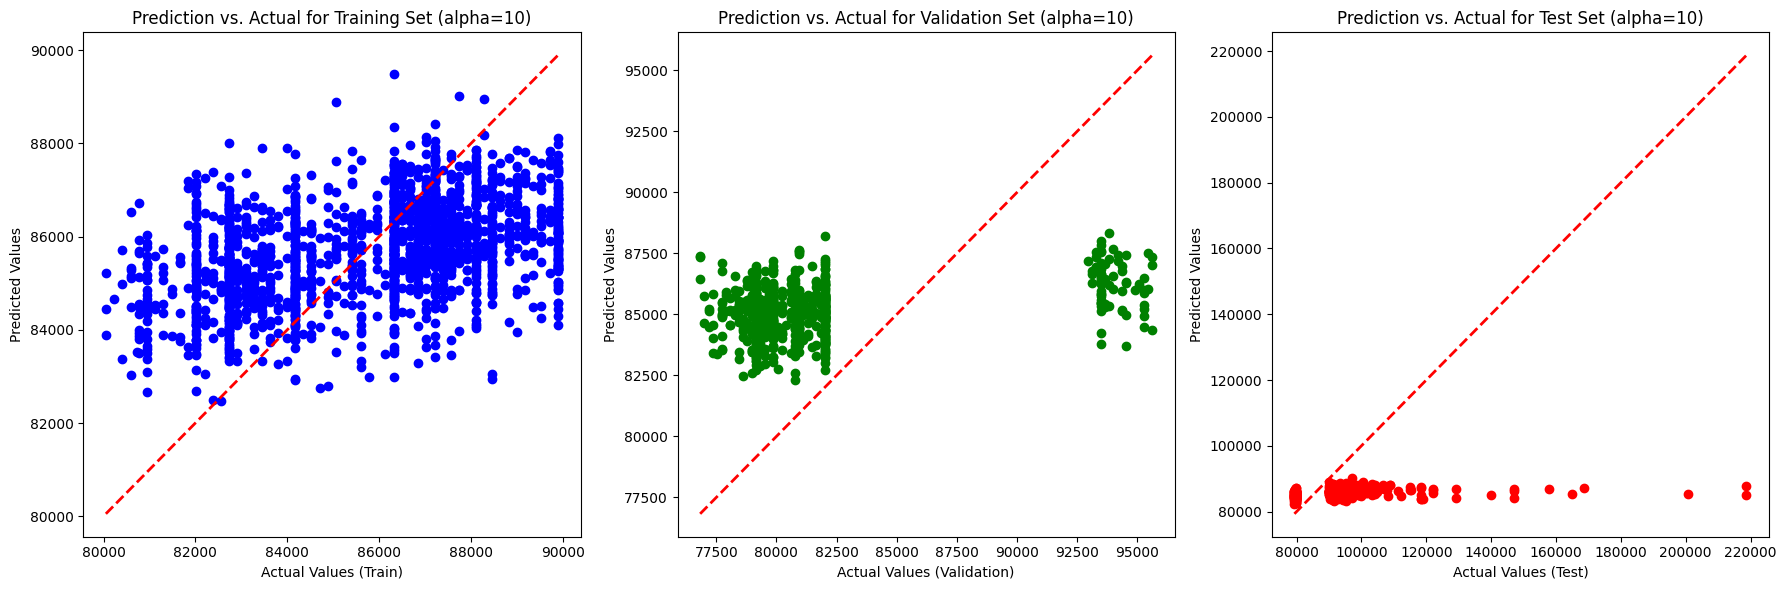

In [ ]:
plt.figure(figsize=(18, 6))

# Prediction vs Actual for Training Set
plt.subplot(1, 3, 1)
plt.scatter(y_train, train_preds, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel('Actual Values (Train)')
plt.ylabel('Predicted Values')
plt.title('Prediction vs. Actual for Training Set (alpha=10)')

# Prediction vs Actual for Validation Set
plt.subplot(1, 3, 2)
plt.scatter(y_val, val_preds, color='green')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel('Actual Values (Validation)')
plt.ylabel('Predicted Values')
plt.title('Prediction vs. Actual for Validation Set (alpha=10)')

# Prediction vs Actual for Test Set
plt.subplot(1, 3, 3)
plt.scatter(y_test, test_preds, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel('Actual Values (Test)')
plt.ylabel('Predicted Values')
plt.title('Prediction vs. Actual for Test Set (alpha=10)')

plt.tight_layout()

> Results: 
* For alpha=0.1, the model shows slightly better performance on the test set, but higher values of alpha reduce overfitting on the training set.
* alpha=10 demonstrates the best balance between training and validation RMSE, suggesting that this value provides the most stable generalization across datasets.
* As alpha increases to 100, RMSE values increase, indicating underfitting.

<hr>

### E.5 Business Impact from Current Model Performance

In [ ]:
# Define feature list for analysis
features_list = ['10percentage', '12percentage', 'Degree', 'Specialization', 'collegeGPA', 'English', 
                 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 
                 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 
                 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', 
                 'GPA_Quant_Interaction', '10_12_Percentage_Interaction', 'GPA_Category']


# Extract feature coefficients
coefficients = pd.DataFrame({
    'Feature': features_list,
    'Coefficient': ri.coef_.flatten()
})

# Sort by absolute value of coefficient for better insights
coefficients['Absolute_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Absolute_Coefficient', ascending=False)

# Display the coefficients
print("Feature Coefficients (Impact on Salary Prediction):")
print(coefficients)


Feature Coefficients (Impact on Salary Prediction):
                         Feature  Coefficient  Absolute_Coefficient
7                          Quant   610.343401            610.343401
0                   10percentage   393.849682            393.849682
5                        English   275.246316            275.246316
11               ComputerScience  -251.058354            251.058354
1                   12percentage   241.234148            241.234148
21         GPA_Quant_Interaction  -228.150951            228.150951
4                     collegeGPA   196.983228            196.983228
8                         Domain   188.410063            188.410063
16             conscientiousness  -175.310103            175.310103
23                  GPA_Category  -171.018322            171.018322
22  10_12_Percentage_Interaction  -167.496903            167.496903
9            ComputerProgramming   152.096460            152.096460
20         openess_to_experience  -149.026067            149.026

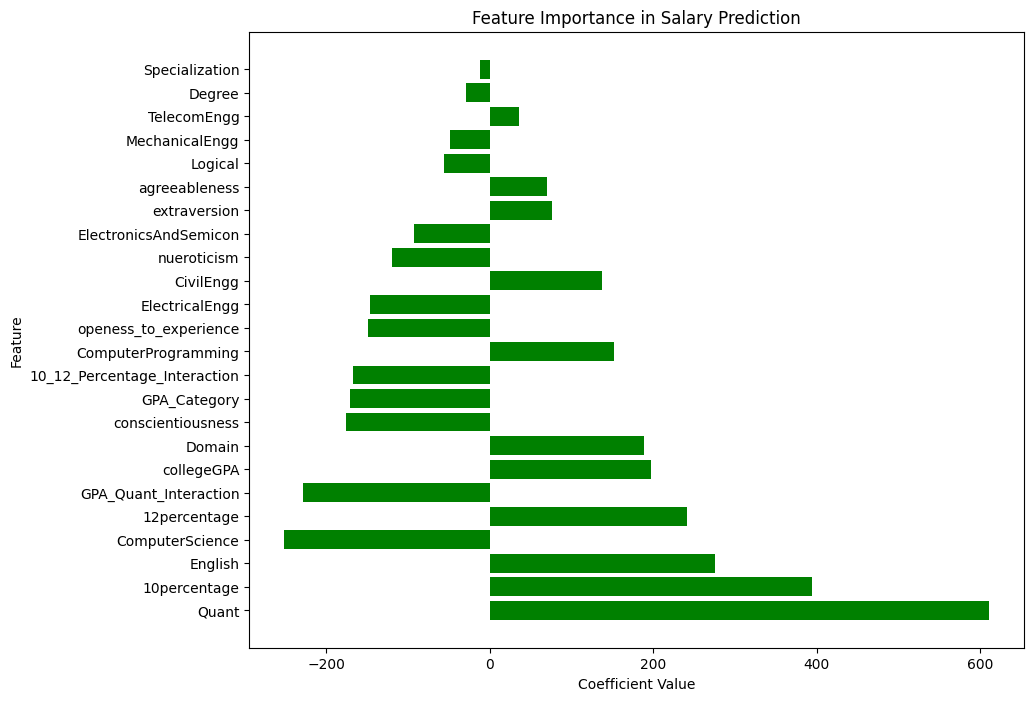

In [ ]:
# Plot the coefficients for a better understanding
plt.figure(figsize=(10, 8))
plt.barh(coefficients['Feature'], coefficients['Coefficient'], color='green')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Salary Prediction')
plt.show()


In [ ]:

# Business Insights based on the feature coefficients
for index, row in coefficients.iterrows():
    feature = row['Feature']
    coef = row['Coefficient']
    
    if coef > 0:
        print(f"Positive Impact: '{feature}' increases the predicted salary. Higher values for '{feature}' correlate with higher salaries.")
    else:
        print(f"Negative Impact: '{feature}' decreases the predicted salary. Higher values for '{feature}' correlate with lower salaries.")

Positive Impact: 'Quant' increases the predicted salary. Higher values for 'Quant' correlate with higher salaries.
Positive Impact: '10percentage' increases the predicted salary. Higher values for '10percentage' correlate with higher salaries.
Positive Impact: 'English' increases the predicted salary. Higher values for 'English' correlate with higher salaries.
Negative Impact: 'ComputerScience' decreases the predicted salary. Higher values for 'ComputerScience' correlate with lower salaries.
Positive Impact: '12percentage' increases the predicted salary. Higher values for '12percentage' correlate with higher salaries.
Negative Impact: 'GPA_Quant_Interaction' decreases the predicted salary. Higher values for 'GPA_Quant_Interaction' correlate with lower salaries.
Positive Impact: 'collegeGPA' increases the predicted salary. Higher values for 'collegeGPA' correlate with higher salaries.
Positive Impact: 'Domain' increases the predicted salary. Higher values for 'Domain' correlate with hig

> Results: 
* Positive Impacts: Features such as Quant, 10percentage, 12percentage, English, collegeGPA, Domain, ComputerProgramming, CivilEngg, TelecomEngg, extraversion, and agreeableness increase predicted salaries. This indicates that businesses should prioritize candidates with strong academic performance, domain expertise, and interpersonal skills.
* Negative Impacts: Features like GPA_Quant_Interaction, ComputerScience, conscientiousness, GPA_Category, 10_12_Percentage_Interaction, ElectricalEngg, nueroticism, ElectronicsAndSemicon, Logical, MechanicalEngg, Degree, and Specialization decrease predicted salaries. This suggests that businesses should be cautious when assessing candidates with lower interaction between GPA and quantitative skills, and lower degrees in specific engineering disciplines.
* Business Use Case: Companies should focus on hiring candidates with strong quantitative reasoning, programming skills, and communication abilities to maximize business outcomes. Educational institutions should emphasize enhancing these key skills to improve student employability and salary potential.

<hr>

## F. Experiment Outcomes

In [ ]:
final_experiment_outcome = 'Hypothesis Partially Confirmed'

> Key Learnings: 
* Higher alpha values in Ridge Regression (e.g., alpha=10) effectively reduce overfitting and improve model generalization, providing a more accurate and stable performance across datasets.
* While very high alpha values can still lead to some underfitting, moderate to high values (e.g., alpha=10) tend to offer the best balance between bias and variance.

> Recommendations for Next Experiment: 
* Hyperparameter Tuning: Continue exploring a wider range of alpha values, both lower and higher, to identify if there is an even better point for balancing bias and variance in Ridge Regression.
* Explore Lasso Regression: Evaluate Lasso Regression to see how it handles feature selection and regularization compared to Ridge Regression, particularly focusing on how different alpha values affect performance.
* Comparison with Other Models: Compare the results of Ridge and Lasso Regression models to determine which regularization technique (L1 vs. L2) provides the best performance for the dataset.


<hr>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=12a1f7ba-c963-4534-995e-794885094f8b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>